[View in Colaboratory](https://colab.research.google.com/github/real-noddy/IoT-AssetTracking-Perishable-Network-Blockchain/blob/master/Deep_Learning%20%7CNavneet_Chauhan.ipynb)

#                                 Deep Learning Assignment 1 |  Navneet Chauhan

## **Q.1 Part A - Telecom Churn Data**

In [0]:
import pandas as pd
from google.colab import files

In [80]:
#Uploading the datasets
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (1).csv


In [81]:
#Using uploaded file for the datsets
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Telco-Customer-Churn.csv" with length 977501 bytes


In [82]:
#Importing functions
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format
import io
customer_churn_df = pd.read_csv(io.StringIO(uploaded['Telco-Customer-Churn.csv'].decode('utf-8')))
customer_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.9,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,57.0,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.9,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [83]:
# Customer ID column is dropped as its just a numeric column and not helpful in training our model 
customer_churn_df.drop("customerID", axis= 1, inplace= True)
customer_churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.9,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,57.0,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.9,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [84]:
#Using dtypes function to find out the data types
customer_churn_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
                     ...   
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Length: 20, dtype: object

In [85]:
#Creation of factors 
customer_churn_df = pd.get_dummies(customer_churn_df, 
                            columns = ['gender', 'Partner', 'Dependents','PhoneService',
                                       'MultipleLines','InternetService','OnlineSecurity',
                                       'OnlineBackup','DeviceProtection','TechSupport',
                                       'StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                                       'PaymentMethod','Churn'], drop_first = False)

customer_churn_df["TotalCharges"] = pd.to_numeric(customer_churn_df.TotalCharges, errors='coerce')

customer_churn_df["TotalCharges"] = customer_churn_df['TotalCharges'].fillna(0)



customer_churn_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.9,29.9,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,57.0,1889.5,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.9,108.2,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.3,1840.8,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.7,151.7,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.8,1990.5,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.2,7362.9,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.6,346.4,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.4,306.6,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


In [0]:
# Pre Processing the datasets

def preprocess_features(customer_churn_df):
  selected_features = customer_churn_df[['SeniorCitizen', 'tenure',
                                  'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes',
                                  'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
                                  'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No',
                                  'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
                                  'OnlineBackup_No internet service', 'OnlineBackup_Yes',
                                  'DeviceProtection_No internet service', 'DeviceProtection_Yes',
                                  'TechSupport_No internet service', 'TechSupport_Yes',
                                  'StreamingTV_No internet service', 'StreamingTV_Yes',
                                  'StreamingMovies_No internet service', 'StreamingMovies_Yes',
                                  'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
                                  'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
                                  'PaymentMethod_Mailed check']]
  
  
  processed_features = selected_features.copy()
  return processed_features

def preprocess_targets(customer_churn_df):

  output_targets = pd.DataFrame()
  output_targets["Churn_Yes"] = customer_churn_df["Churn_Yes"]
  return output_targets

In [91]:
# Training and Validation

# Training Partition 4093
training_examples = preprocess_features(customer_churn_df.head(4093))
training_targets = preprocess_targets(customer_churn_df.head(4093))

# Choose the last 2113 examples for validation.
validation_examples = preprocess_features(customer_churn_df.tail(2113))
validation_targets = preprocess_targets(customer_churn_df.tail(2113))

print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,4093.0,4093.0,4093.0,4093.0,4093.0,4093.0,4093.0,4093.0,4093.0,4093.0,...,4093.0,4093.0,4093.0,4093.0,4093.0,4093.0,4093.0,4093.0,4093.0,4093.0
mean,0.2,32.1,64.9,2263.6,0.5,0.5,0.3,0.9,0.1,0.4,...,0.2,0.4,0.2,0.4,0.2,0.2,0.6,0.2,0.3,0.2
std,0.4,24.6,30.0,2268.0,0.5,0.5,0.5,0.3,0.3,0.5,...,0.4,0.5,0.4,0.5,0.4,0.4,0.5,0.4,0.5,0.4
min,0.0,0.0,18.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,8.0,35.6,374.5,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,28.0,70.5,1375.4,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,0.0,55.0,90.0,3771.5,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
max,1.0,72.0,118.7,8564.8,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Validation examples summary:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,2113.0,2113.0,2113.0,2113.0,2113.0,2113.0,2113.0,2113.0,2113.0,2113.0,...,2113.0,2113.0,2113.0,2113.0,2113.0,2113.0,2113.0,2113.0,2113.0,2113.0
mean,0.2,32.5,64.5,2282.5,0.5,0.5,0.3,0.9,0.1,0.4,...,0.2,0.4,0.2,0.4,0.2,0.2,0.6,0.2,0.3,0.2
std,0.4,24.4,30.0,2258.7,0.5,0.5,0.5,0.3,0.3,0.5,...,0.4,0.5,0.4,0.5,0.4,0.4,0.5,0.4,0.5,0.4
min,0.0,0.0,18.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,9.0,35.5,413.2,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,29.0,70.2,1387.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,0.0,55.0,89.5,3824.2,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
max,1.0,72.0,118.3,8670.1,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Training targets summary:


,Churn_Yes
count,4093.0
mean,0.3
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,1.0
max,1.0


Validation targets summary:


,Churn_Yes
count,2113.0
mean,0.3
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,1.0
max,1.0


In [92]:
validation_targets

,Churn_Yes
4930,0
4931,0
4932,0
4933,0
4934,0
...,...
7038,0
7039,0
7040,0
7041,1


In [94]:
training_examples.shape[0]

4093

In [95]:
# Build the model (Using Keras API)
# Dense = all neurons are connected
# 64 - number of neurons used.
# This is a regression and we are using sigmoid and binary_crossentropy for modeling

model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)

])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])



model.summary() #last layer is 1 node

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                1984      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 6,209
Trainable params: 6,209
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Store training stats

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50
tf.set_random_seed(1)

# Store training stats
history = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


..................................................

In [97]:
print(history.history)

{'val_loss': [3.072972521240458, 2.7699909821534767, 2.9910248440846128, 1.6455161286215496, 1.7130756669283205, 2.770212016262851, 7.517706009348961, 2.698803242600736, 3.9578429916111686, 2.628510052467877, 3.7317402854798334, 3.27249184458247, 3.068790827624236, 2.5078008783314836, 2.323079991835523, 4.302974916930891, 3.1277720494439167, 2.669742785093985, 2.1541448437105024, 1.8029572195185846, 1.8090677808638167, 1.5023747162941175, 2.787663382924957, 2.1791520872686663, 3.9056599795163334, 2.9755396773090292, 4.3462924805898515, 4.3174011803372006, 3.3101528922280115, 3.1613682879633083, 2.8155368239015015, 2.448182042556222, 1.8937612360068148, 2.817230983822628, 1.8091365001431605, 4.346100911407098, 3.0656743346553146, 1.99993411612598, 2.0002218829843152, 2.256192195109832, 4.323689733814989, 3.2756843788137657, 3.067294757735889, 2.1618494725489352, 2.0753978972615483, 1.4713120562398536, 2.5645482013222645, 3.4545944770468315, 3.848897960159805, 2.728203632601597], 'val_ac

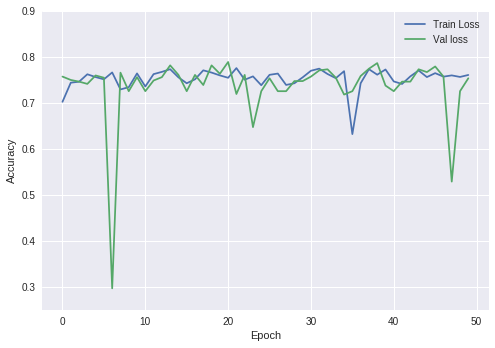

In [101]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0.25, 0.9])

plot_history(history)

# **Q.1 Part B: Bike Sharing Data**

In [168]:
uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving day.csv to day (2).csv
User uploaded file "day.csv" with length 56806 bytes


In [169]:
tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format
import io


tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format
bike_sharing_df = pd.read_csv("day.csv",sep=",")
bike_sharing_df = bike_sharing_df.reindex( np.random.permutation(bike_sharing_df.index))

bike_sharing_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
542,543,6/26/2012,3,1,6,0,2,1,1,0.6,0.6,0.4,0.3,1077,6365,7442
61,62,3/3/2011,1,0,3,0,4,1,1,0.2,0.2,0.3,0.2,123,1562,1685
307,308,11/4/2011,4,0,11,0,5,1,2,0.4,0.4,0.6,0.3,470,3576,4046
613,614,9/5/2012,3,1,9,0,3,1,1,0.7,0.7,0.7,0.2,832,6280,7112
194,195,7/14/2011,3,0,7,0,4,1,1,0.7,0.6,0.5,0.2,888,4196,5084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,212,7/31/2011,3,0,7,0,0,0,1,0.8,0.7,0.5,0.2,1524,2778,4302
490,491,5/5/2012,2,1,5,0,6,0,2,0.6,0.6,0.8,0.2,2496,4387,6883
563,564,7/17/2012,3,1,7,0,2,1,1,0.8,0.8,0.5,0.1,921,5865,6786
148,149,5/29/2011,2,0,5,0,0,0,1,0.7,0.6,0.8,0.2,2355,2433,4788


In [181]:
bike_sharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
               ...   
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
Length: 16, dtype: object

In [0]:
# PREPROCESSING THE DATA - the input for the model

def preprocess_features(bike_sharing_df):
  selected_features = bike_sharing_df[
    [ 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered',]]
 # here we are converting features to categorical 
  x=len(list(selected_features))
  for i in range(1,x):
    if i!=0 and i!=8 and i!=9 and i!=10 and i!=11 and i!=12 and i!=13:
      selected_features[list(selected_features)[i]]=selected_features[list(selected_features)[i]].astype('category')
 
 # creating dummies - and dropping to make them into binary for model to work.   
  cat_columns=selected_features.select_dtypes(['category']).columns
  one=pd.get_dummies(selected_features[cat_columns],drop_first=True)
  one['temp']= selected_features['temp']
  one['atemp']= selected_features['atemp']
  one['hum']= selected_features['hum']
  one['windspeed']= selected_features['windspeed']
  return one

 # PRE PROCESSING THE OUTPUT TARGET - CNT 
def preprocess_targets(bike_sharing_df):
  output_targets = bike_sharing_df[['cnt']]   
  return output_targets

In [183]:
bike_sharing_df.columns.values

array(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'], dtype=object)

In [184]:
# Choose the first 500 examples for training.
training_examples = preprocess_features(bike_sharing_df.head(500))
training_targets = preprocess_targets(bike_sharing_df.head(500))

# Choose the last 231 examples for validation.
validation_examples = preprocess_features(bike_sharing_df.tail(231))
validation_targets = preprocess_targets(bike_sharing_df.tail(231))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

def data():
  return training_examples, training_targets, validation_examples, validation_targets

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Training examples summary:


,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,...,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,temp,atemp,hum,windspeed
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,0.2,0.3,0.2,0.5,0.1,0.1,0.1,0.1,0.1,0.1,...,0.2,0.1,0.1,0.7,0.3,0.0,0.5,0.5,0.6,0.2
std,0.4,0.4,0.4,0.5,0.3,0.3,0.3,0.3,0.3,0.3,...,0.4,0.4,0.3,0.5,0.5,0.2,0.2,0.2,0.1,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.5,0.1
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.5,0.6,0.2
75%,0.2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.7,0.6,0.7,0.2
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.8,0.8,1.0,0.5


Validation examples summary:


,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,...,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,temp,atemp,hum,windspeed
count,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,...,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0
mean,0.3,0.2,0.2,0.5,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.2,0.7,0.3,0.0,0.5,0.5,0.6,0.2
std,0.4,0.4,0.4,0.5,0.3,0.3,0.3,0.3,0.3,0.2,...,0.3,0.3,0.4,0.5,0.5,0.2,0.2,0.2,0.1,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.3,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.5,0.1
50%,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.5,0.6,0.2
75%,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.6,0.6,0.7,0.2
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,0.9,0.4


Training targets summary:


,cnt
count,500.0
mean,4545.9
std,1916.6
min,431.0
25%,3242.0
50%,4548.5
75%,5997.2
max,8714.0


Validation targets summary:


,cnt
count,231.0
mean,4414.4
std,1982.3
min,22.0
25%,2754.0
50%,4521.0
75%,5927.0
max,8294.0


In [185]:
validation_targets

,cnt
372,3425
161,4966
136,4123
12,1406
687,4669
...,...
211,4302
490,6883
563,6786
148,4788


# **Q. 2 A: 1 Hidden Layer vs 2 Hidden Layers**

### **With 2 Hidden Layer**

**Insights:**

With 1 hidden layer, the error rate doesn’t improve much with increase in number of EPOCHS. 

With 2 hidden layer, as the number of EPOCHS increases the error rate decrease and the model becomes more robust in terms of performance. At a point Training loss and validation loss have same error rate.

Difference between Training and Validation loss is wide with a single hidden layer where With 2 hidden layers training and validation loss minimize.

In [207]:
import random 
random.seed(10) 
tf.set_random_seed(42) 
model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 65        
Total params: 6,145
Trainable params: 6,145
Non-trainable params: 0
_________________________________________________________________


In [208]:
# Store training stats

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50
tf.set_random_seed(1)

# Store training stats
history = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


..................................................

In [209]:
print(history.history)

{'val_loss': [22211271.68, 22189016.96, 22155105.28, 22106462.56, 22042105.92, 21956515.2, 21850686.88, 21724104.32, 21573794.88, 21396588.48, 21196913.6, 20966168.0, 20702204.48, 20418663.84, 20104692.0, 19755882.72, 19377585.44, 18969859.52, 18541281.92, 18070908.0, 17568185.76, 17030366.24, 16474042.72, 15890248.96, 15266560.0, 14633829.28, 13978037.28, 13297714.4, 12605121.52, 11885729.6, 11167698.56, 10422404.8, 9678192.0, 8947671.6, 8214673.52, 7498812.72, 6822258.48, 6168786.44, 5530349.64, 4933669.4, 4376745.92, 3860724.36, 3407341.52, 3032016.88, 2715415.28, 2473269.6, 2286662.98, 2175816.28, 2099097.02, 2054050.04], 'val_mean_absolute_error': [4299.3529296875, 4296.9215625, 4293.227265625, 4287.9255859375, 4280.8893359375, 4271.5275, 4259.925078125, 4245.9819921875, 4229.3634375, 4209.706796875, 4187.4453125, 4161.58373046875, 4131.82818359375, 4099.60384765625, 4063.621875, 4023.27537109375, 3979.0503125, 3930.86126953125, 3879.5175, 3822.3984765625, 3760.5044140625, 3693.08

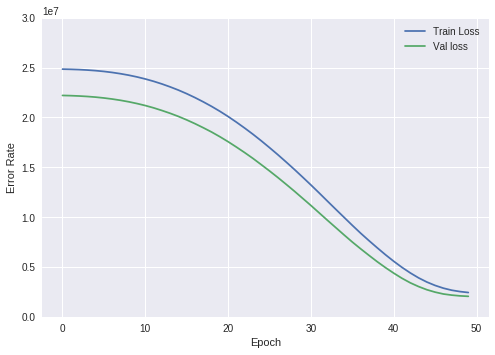

In [210]:
#Plotting the graph
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Error Rate')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 30000000])

plot_history(history)

### **With 1 Hidden Layer**

In [211]:
import random 
random.seed(10) 
tf.set_random_seed(42) 
model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(1)
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 65        
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________


In [212]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50

# Store training stats
history = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


..................................................

In [213]:
print(history.history)

{'val_loss': [22222854.08, 22218118.4, 22213062.4, 22207390.24, 22200934.24, 22193867.2, 22186209.12, 22177669.92, 22168609.92, 22158754.24, 22148277.92, 22137044.8, 22124932.8, 22112026.08, 22098522.24, 22084168.32, 22069037.76, 22053488.96, 22036669.76, 22019312.8, 22001174.72, 21982407.68, 21962806.08, 21942574.56, 21921379.84, 21899485.12, 21876927.68, 21853969.28, 21829643.04, 21804986.24, 21779849.76, 21753362.72, 21726706.56, 21699156.0, 21671241.28, 21642008.32, 21612441.92, 21581679.36, 21549977.92, 21518022.88, 21485313.28, 21451657.92, 21417624.32, 21383068.96, 21347299.36, 21311341.92, 21274425.12, 21236444.96, 21197978.56, 21158759.36], 'val_mean_absolute_error': [4300.6171875, 4300.099765625, 4299.5466015625, 4298.9248046875, 4298.2205078125, 4297.4473046875, 4296.6106640625, 4295.67876953125, 4294.689453125, 4293.6140625, 4292.47015625, 4291.2430859375, 4289.92052734375, 4288.50875, 4287.03390625, 4285.46462890625, 4283.80943359375, 4282.107265625, 4280.26630859375, 4278

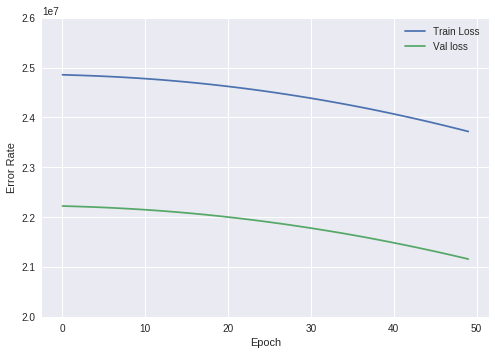

In [214]:
#Plotting the graph
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Error Rate')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([20000000, 26000000])

plot_history(history)

### **Q. 2 (A) Part B: 2/ 3 the size of the Input layer, plus the size of the Output layer**

We have taken (2/3)*16(Input layer) + 1 Output layer = 11 Layers

As we decrease the no. of neurons in the hidden layers between 2/3rd of the input, we have seen not much improvement with EPOCHS remains at 50. Also, distance between training and validation loss increases as the no. of neurons decreses. Not a good sign for a model.

In [221]:
import random 
random.seed(10) 
tf.set_random_seed(42) 
model = keras.Sequential([
    keras.layers.Dense(11, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(11, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 11)                330       
_________________________________________________________________
dense_51 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 12        
Total params: 474
Trainable params: 474
Non-trainable params: 0
_________________________________________________________________


In [222]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50

# Store training stats
history = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


..................................................

In [223]:
print(history.history)

{'val_loss': [22226693.44, 22225744.0, 22225048.8, 22224331.84, 22223427.52, 22222221.44, 22220664.0, 22218755.84, 22216475.84, 22213735.36, 22210495.2, 22206677.6, 22202412.48, 22197415.2, 22191689.6, 22185247.36, 22178288.96, 22170509.44, 22161774.56, 22152217.6, 22141792.32, 22130572.96, 22118456.64, 22105368.64, 22091167.36, 22075719.04, 22059127.52, 22041627.2, 22023080.32, 22003412.96, 21982445.44, 21959807.36, 21935960.64, 21911378.88, 21885017.92, 21857256.0, 21827980.8, 21797409.92, 21765416.32, 21732288.32, 21696239.36, 21660603.68, 21622698.56, 21582216.8, 21540669.28, 21497860.16, 21452759.04, 21405337.76, 21357336.16, 21307736.32], 'val_mean_absolute_error': [4301.03009765625, 4300.92375, 4300.8456640625, 4300.76494140625, 4300.662890625, 4300.5279296875, 4300.3537890625, 4300.1398828125, 4299.8852734375, 4299.58052734375, 4299.22138671875, 4298.79962890625, 4298.328984375, 4297.77982421875, 4297.1511328125, 4296.4448828125, 4295.68138671875, 4294.828359375, 4293.870625, 4

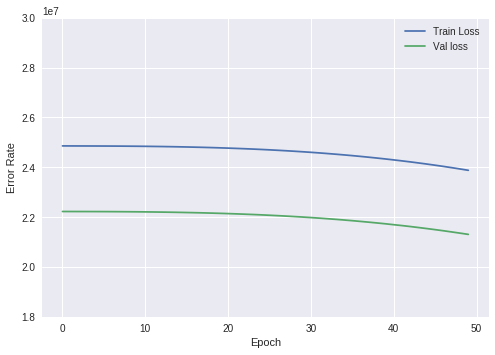

In [225]:
#Plotting the graph
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Error Rate')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([18000000, 30000000])

plot_history(history)

### **Q. 2 (B) Part B: Twice the size of input layer**

**Insights:** 

Taking twice the size of input layers. At present, 16 input variables, with twice the size we will be having 32 input.

As the amount of neurons increases in the model, with increase in EPOCHS we have seen improvement in the error rate. With 2 hidden layers, and 32 input node generates greater results by improving the error rate. 

In [229]:
import random 
random.seed(10) 
tf.set_random_seed(42) 
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 32)                960       
_________________________________________________________________
dense_57 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 33        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [230]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50

# Store training stats
history = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


..................................................

In [231]:
print(history.history)

{'val_loss': [22224018.4, 22219155.52, 22213092.16, 22205075.68, 22194591.68, 22181073.12, 22164393.28, 22143896.16, 22119138.56, 22089832.64, 22056037.28, 22017369.76, 21972811.84, 21922436.48, 21866221.44, 21802912.32, 21732342.24, 21656072.96, 21571771.84, 21481616.64, 21379892.48, 21273667.52, 21158543.2, 21035856.32, 20901044.8, 20759146.4, 20609242.24, 20447762.72, 20278506.88, 20097226.72, 19906587.52, 19707394.24, 19495433.6, 19277884.32, 19046279.36, 18805280.96, 18554154.72, 18297065.12, 18025941.28, 17745500.0, 17451988.32, 17152853.76, 16840696.32, 16523990.4, 16194398.56, 15852556.8, 15505498.88, 15152451.68, 14787091.04, 14416315.52], 'val_mean_absolute_error': [4300.7295703125, 4300.19810546875, 4299.53388671875, 4298.6583203125, 4297.5166015625, 4296.04560546875, 4294.22904296875, 4291.99564453125, 4289.29572265625, 4286.09568359375, 4282.3975, 4278.161484375, 4273.27796875, 4267.7517578125, 4261.5801953125, 4254.6248828125, 4246.85560546875, 4238.435078125, 4229.114746

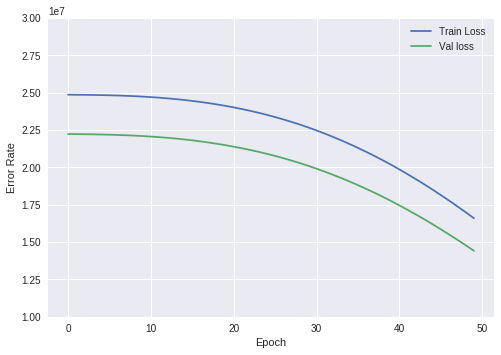

In [233]:
#Plotting the graph
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Error Rate')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([10000000, 30000000])

plot_history(history)

### **Q. 2 (C): With Batch Size 2, 4, 8**

### **Batch Size = 2**

**Insights:**
We have kept the batch size as 2 in the model.fit by assigning batch_size inside the function. By adding, batch size as 2, we have seen great decrement in the error rate with increase in EPOCHS. Even, the difference in the error rate with Training and Validation loss has gone minimal.

In [277]:
import random 
random.seed(10) 
tf.set_random_seed(42) 
model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_78 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 65        
Total params: 6,145
Trainable params: 6,145
Non-trainable params: 0
_________________________________________________________________


In [278]:
# Store training stats

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50
tf.set_random_seed(1)

# Store training stats
history = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, batch_size = 2,
                    callbacks=[PrintDot()])


..................................................

In [279]:
print(history.history)

{'val_loss': [21167086.145, 16021527.97625, 7269670.118691406, 2213460.25078125, 1936299.899375, 1742574.10421875, 1568790.3675, 1441011.913125, 1310557.15296875, 1255661.8890625, 1088920.3259765625, 1015474.3537109375, 943928.5333398437, 898128.3871289062, 845128.2648046875, 820532.5367578125, 819873.0651367188, 747453.9915502929, 736802.65984375, 719959.0194335937, 721952.2898632813, 689773.1259765625, 661644.3203515625, 671357.7551953126, 642895.3931640625, 632938.70484375, 623795.1041015625, 617380.206796875, 619696.3193359375, 631899.660859375, 656220.341796875, 602132.098671875, 594714.4630859375, 602456.6660546875, 579650.011171875, 569952.8173828125, 576521.1240039063, 566785.70109375, 557529.8312890625, 581372.203125, 555874.91046875, 563855.807265625, 542327.488359375, 545829.9933203125, 545449.4591015625, 537235.2290625, 547349.6537695313, 534418.4133203125, 544278.361796875, 534662.114765625], 'val_mean_absolute_error': [4184.268586425781, 3566.0369580078127, 2207.559766845

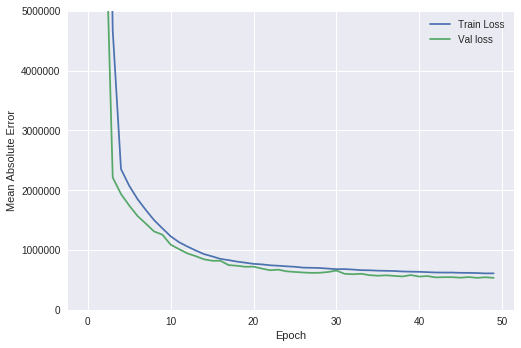

In [280]:
#Plotting the graph
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
  plt.legend()
  #plt.ylim([0, 5000000])

plot_history(history)

**Batch Size = 4**

**Insights**:

With Batch Size = 4, keeping every other parameter constant, we have seen larger difference between training and validation loss. MAE value fluctuates with greater EPOCHS and it doesn't remain constant with Validation Loss.

In [281]:
# Store training stats

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50
tf.set_random_seed(1)

# Store training stats
history = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, batch_size = 4,
                    callbacks=[PrintDot()])


..................................................

In [266]:
print(history.history)

{'val_loss': [522917.3575, 511190.495625, 514362.4325, 514698.26, 509435.425625, 515411.150625, 519762.526875, 506214.901875, 523781.899375, 511475.87875, 502776.04875, 505575.7925, 512987.355625, 511192.6225, 502842.29375, 525416.989375, 509052.745, 508816.945, 501391.270625, 501427.8375, 525113.469375, 519499.12125, 498376.02625, 514027.635625, 520234.491875, 498984.138125, 498545.455, 513979.169375, 518596.554375, 518534.235625, 501301.405625, 510515.5925, 517849.466875, 508922.554375, 497803.521875, 504490.7075, 499765.995, 500203.119375, 497475.696875, 500633.358125, 501333.36, 508149.596875, 499253.60625, 502540.7225, 503111.621875, 493595.3146875, 495370.17375, 506398.42375, 497945.81625, 494773.005625], 'val_mean_absolute_error': [558.54888671875, 561.6132250976563, 556.9748974609375, 556.47251953125, 560.1021374511719, 556.0806774902344, 555.9916577148438, 559.6346264648438, 556.4445300292969, 553.8797473144531, 557.8386279296875, 556.9470532226562, 554.6495251464844, 554.2388

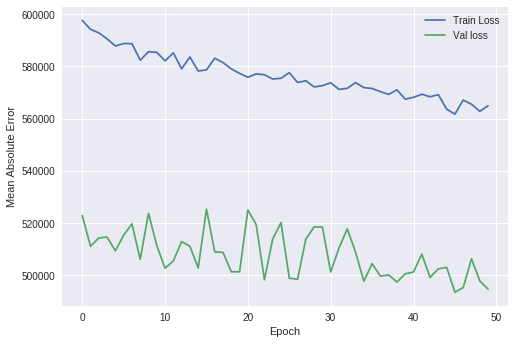

In [267]:
#Plotting the graph
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
  plt.legend()
  #plt.ylim()

plot_history(history)

**Batch Size = 8**

**Insights:**
With Batch size = 8, keeping every parameter constant we have seen similar results for the validation loss where it fluctuates more with the no. of EPOCHS. We have seen pattern where once we increase the Batch Size, fluctuation increases in the Validation Loss as model is not stable.

The best model fit with parameter batch size 2 has worked very well compared to 4 & 8.

In [268]:
# Store training stats

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50
tf.set_random_seed(1)

# Store training stats
history = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, batch_size = 8,
                    callbacks=[PrintDot()])


..................................................

In [269]:
print(history.history)

{'val_loss': [492780.995, 495110.615, 493790.43125, 497371.11, 502937.04, 500956.2925, 500219.8725, 492423.99, 496385.52375, 493253.7175, 504844.6325, 513490.9575, 505811.0375, 489689.695, 489822.91875, 494793.63625, 492879.22125, 489223.415, 505988.5325, 495090.625, 490369.43, 493571.08375, 492952.60625, 501288.79, 497677.1875, 496076.9625, 490071.46875, 496418.0, 504772.7875, 493918.22, 506963.235, 497853.59, 490288.8625, 498016.585, 515219.4125, 487848.83375, 507863.205, 506234.4625, 502399.915, 510676.9775, 500307.225, 489869.7675, 506340.37, 497747.7025, 513139.56, 487337.6575, 496806.8025, 488754.0575, 519130.06375, 502733.7725], 'val_mean_absolute_error': [553.27673828125, 550.7317041015625, 552.6811206054688, 550.5318676757812, 550.1357592773437, 549.8416577148438, 549.657763671875, 551.6615087890625, 549.1421337890625, 550.1501635742187, 550.37951171875, 553.6741064453125, 550.6702709960938, 552.2420727539062, 550.8429223632812, 548.7530151367188, 549.0290551757812, 551.419033

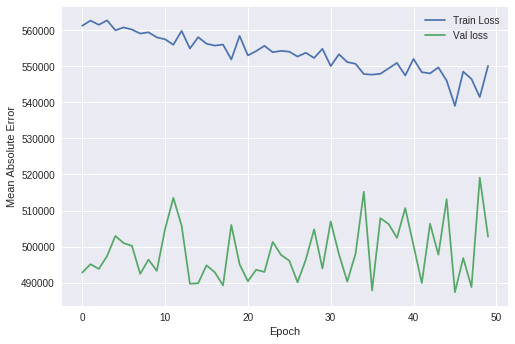

In [270]:
#Plotting the graph
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
  plt.legend()
  #plt.ylim()

plot_history(history)

**Q.2 d:	Activation function - ReLU and SeLU**

**Insights:** We don't see much difference in the output of MAError Vs EPOCHS. There is marginal difference recorded with activation function ReLU & SeLU in the output.

In [256]:
import random 
random.seed(10) 
tf.set_random_seed(42) 
model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.selu),
    keras.layers.Dense(1)
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_69 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 65        
Total params: 6,145
Trainable params: 6,145
Non-trainable params: 0
_________________________________________________________________


In [257]:
# Store training stats

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50
tf.set_random_seed(1)

# Store training stats
history = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


..................................................

In [258]:
print(history.history)

{'val_loss': [22190422.4, 22146824.8, 22089111.2, 22017576.16, 21932274.24, 21828884.16, 21701659.84, 21554711.84, 21380851.84, 21183352.32, 20955426.24, 20698948.8, 20408464.0, 20096636.16, 19746018.4, 19374090.24, 18966551.36, 18526954.4, 18057488.8, 17552556.8, 17018631.52, 16453467.6, 15857148.96, 15238137.92, 14605153.84, 13945765.12, 13266986.16, 12559886.56, 11832608.64, 11099308.48, 10343938.56, 9600457.44, 8881285.36, 8159225.92, 7437095.68, 6738250.12, 6054352.96, 5445682.24, 4840612.04, 4291094.92, 3777771.68, 3346207.48, 2943993.76, 2641447.4, 2417222.16, 2239569.96, 2140826.7, 2068102.58, 2026057.46, 1991901.08], 'val_mean_absolute_error': [4297.09986328125, 4292.33015625, 4285.98447265625, 4278.1006640625, 4268.67783203125, 4257.2587890625, 4243.2119921875, 4226.956328125, 4207.65994140625, 4185.6430859375, 4160.1076171875, 4131.21517578125, 4098.2382421875, 4062.51978515625, 4022.0324609375, 3978.61498046875, 3930.500234375, 3877.9311328125, 3821.00703125, 3758.860410156

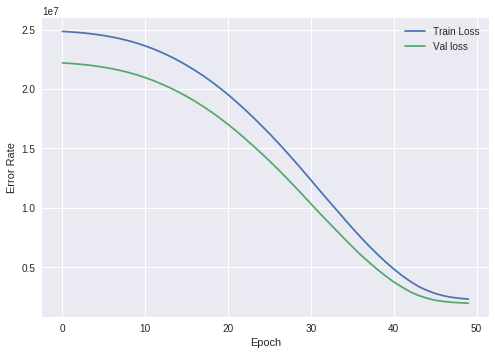

In [259]:
#Plotting the graph
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Error Rate')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
  plt.legend()
  #plt.ylim()

plot_history(history)

# **Q.1 C - Predicting Forest Cover Type**

In [52]:
uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving covtype.csv to covtype.csv
User uploaded file "covtype.csv" with length 75170064 bytes


In [54]:
tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format
import io


tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format
forest_cover_type_df = pd.read_csv("covtype.csv",sep=",")
forest_cover_type_df = forest_cover_type_df.reindex( np.random.permutation(forest_cover_type_df.index))

forest_cover_type_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
246557,2191,8,24,300,80,480,184,185,131,216,...,0,0,0,0,0,0,0,0,0,6
254875,2428,24,6,120,49,968,217,227,147,646,...,0,0,0,0,0,0,0,0,0,3
279918,2962,20,7,300,39,1558,215,225,147,765,...,0,0,0,0,0,0,0,0,0,2
257676,2942,290,22,90,56,541,152,231,216,1679,...,0,0,0,0,0,0,0,0,0,2
413624,3139,70,17,175,59,2948,236,205,96,1045,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189775,3225,52,20,255,52,5313,226,193,93,1652,...,0,0,0,0,0,0,0,0,0,2
443525,3003,14,26,240,144,551,186,177,118,2992,...,0,0,0,0,0,0,0,0,0,2
170443,3260,280,10,711,152,6135,193,241,188,2640,...,0,0,0,0,0,0,0,0,0,2
146866,2891,265,14,212,56,2965,184,246,200,2156,...,0,0,0,0,0,0,0,0,0,2


In [57]:
forest_cover_type_df.dtypes

Elevation                           int64
Aspect                              int64
Slope                               int64
Horizontal_Distance_To_Hydrology    int64
Vertical_Distance_To_Hydrology      int64
                                    ...  
Soil_Type37                         int64
Soil_Type38                         int64
Soil_Type39                         int64
Soil_Type40                         int64
Cover_Type                          int64
Length: 55, dtype: object

In [58]:
forest_cover_type_df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [0]:
# Pre Process
def preprocess_features(forest_cover_type_df):

  selected_features = forest_cover_type_df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']]
  
  
  processed_features = selected_features.copy()
  return processed_features

def preprocess_targets(forest_cover_type_df):

  output_targets = pd.DataFrame()
  output_targets["Cover_Type"] = forest_cover_type_df["Cover_Type"]
  return output_targets

In [69]:
# Training and Validation

# Training Partition 406700
training_examples = preprocess_features(forest_cover_type_df.head(406700))
training_targets = preprocess_targets(forest_cover_type_df.head(406700))

# Choose the last 174312 examples for validation.
validation_examples = preprocess_features(forest_cover_type_df.tail(174312))
validation_targets = preprocess_targets(forest_cover_type_df.tail(174312))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,406700.0,406700.0,406700.0,406700.0,406700.0,406700.0,406700.0,406700.0,406700.0,406700.0,...,406700.0,406700.0,406700.0,406700.0,406700.0,406700.0,406700.0,406700.0,406700.0,406700.0
mean,2959.4,155.5,14.1,269.5,46.5,2349.6,212.2,223.3,142.5,1978.8,...,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,279.9,111.9,7.5,212.7,58.3,1559.8,26.8,19.8,38.3,1323.6,...,0.2,0.3,0.3,0.1,0.1,0.0,0.0,0.2,0.2,0.1
min,1859.0,0.0,0.0,0.0,-173.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2809.0,58.0,9.0,108.0,7.0,1103.0,198.0,213.0,119.0,1022.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2996.0,127.0,13.0,218.0,30.0,1997.0,218.0,226.0,143.0,1708.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3163.0,260.0,18.0,390.0,69.0,3326.0,231.0,237.0,168.0,2550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3858.0,360.0,66.0,1397.0,601.0,7116.0,254.0,254.0,254.0,7172.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Validation examples summary:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,174312.0,174312.0,174312.0,174312.0,174312.0,174312.0,174312.0,174312.0,174312.0,174312.0,...,174312.0,174312.0,174312.0,174312.0,174312.0,174312.0,174312.0,174312.0,174312.0,174312.0
mean,2959.4,156.0,14.1,269.2,46.3,2351.4,212.1,223.3,142.6,1983.8,...,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,280.2,112.0,7.5,212.3,58.3,1557.9,26.8,19.7,38.3,1325.7,...,0.2,0.3,0.3,0.1,0.1,0.0,0.0,0.2,0.2,0.1
min,1868.0,0.0,0.0,0.0,-159.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2809.0,59.0,9.0,108.0,7.0,1110.0,198.0,213.0,119.0,1026.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2995.0,127.0,13.0,218.0,29.0,1998.0,218.0,226.0,143.0,1716.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3164.0,261.0,18.0,384.0,69.0,3331.0,231.0,237.0,168.0,2550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3857.0,360.0,65.0,1390.0,597.0,7117.0,254.0,254.0,253.0,7173.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Training targets summary:


,Cover_Type
count,406700.0
mean,2.1
std,1.4
min,1.0
25%,1.0
50%,2.0
75%,2.0
max,7.0


Validation targets summary:


,Cover_Type
count,174312.0
mean,2.1
std,1.4
min,1.0
25%,1.0
50%,2.0
75%,2.0
max,7.0


In [70]:
validation_targets

,Cover_Type
357006,1
518946,1
295653,1
202077,1
341972,2
...,...
189775,2
443525,2
170443,2
146866,2


In [73]:
# Build the model (Using Keras API)
# Dense = all neurons are connected
# 64 - number of neurons used.
# This is a regression 

model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.softmax)

])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                3520      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 520       
Total params: 8,200
Trainable params: 8,200
Non-trainable params: 0
_________________________________________________________________


In [74]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 25
tf.set_random_seed(1)

# Store training stats
history = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


.........................

In [75]:
print(history.history)

{'val_loss': [8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478, 8.230453682555478], 'val_acc': [0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.48936562577131076, 0.4893656257713

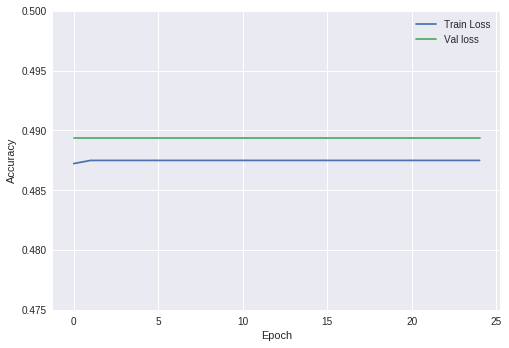

In [78]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0.475, 0.5])

plot_history(history)

**Q. 3:	Discuss the results of your comparison and provide an explanation of the results (What is the purpose of the hyperparameter, why did one value do better than the other?)**

We use hyperparameter to tune the model/algorithm to it's optimal value. We use different set of hyperparameters that require different constraints, weights, learning rates that improve the model and generate the different set of data patterns. With every changes in the parameters, we see the model more robust and generate better results.

Hyperparameters are basically Batch size, EPOCHS, Optimizer. With the perfect combination of batch size, epochs and optimizer model tunes to it's optimal value. As we have seen in Q.2C, as we have seen batch_size = 2, MAE has improved with greater EPOCHS and generated good results. Tuning hyperparameteres, wiith batch size more than 2 have genrated fluctiating resulta and hamper the robustness of the model.

On a similar line, with ReLU & SeLU function we have not seen much difference in terms of training and validation MAE, though optimization function makes much more difference while tuning and resulted in greater output change. 

# ***Please Note:***

I have taken Q.1 B (Bike Sharing data) for comparison in question 2. I have merged Q. 2 in Q. 1(B). Kindly review it accordingly.